In [1]:
#Import all libraries needed.
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')

In [2]:
#Load data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



In [3]:
#look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
#Get the shape of the arrays.
#Shape: #rows, x by x, depth
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [5]:
#Take a look at the first image as an array
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

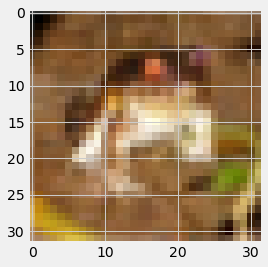

In [6]:
#Show the image as a picture
img = plt.imshow(x_train[index])

In [7]:
#get the image label
#every number corresponds to a classification
print('The image label is: ', y_train[index])

The image label is:  [6]


In [8]:
#Get the image classification
classification = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#Print the image class
print("The image class is:",classification[y_train[index][0]])




The image class is: frog


In [9]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
#Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
#Print the new label of the image/picture above.
print("The one hot label is:",y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
#Normalize the pixels to be values between 0 and 1.
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [14]:
#Create the model's NEURAL NETWORK architecture
model = Sequential()


#Add the 1st layer.
#Convolution layer to extreact features from the input image, then will create 32 5 x 5 feature maps.
model.add( Conv2D(32,(5,5), activation='relu', input_shape=(32,32,3)) )

#Add a pooling layer.
#Creates 2 x 2 filter to get the max element from the feature maps.
model.add(MaxPooling2D(pool_size = (2,2)))


#Add a second convolution layer.
model.add( Conv2D(32,(5,5), activation='relu') )


#Add another pooling layer.
#Creates 2 x 2 filter to get the max element from the feature maps.
model.add(MaxPooling2D(pool_size = (2,2)))



#Add a flattening layer.
#Reduce dimensionality to a liner array.
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))


#Add a drop out layer.
model.add(Dropout(0.5))



#Add another layer with 500 neurons this time
model.add(Dense(500, activation='relu'))


#Add another drop out layer.
model.add(Dropout(0.5))




#Add another layer with 250 neurons this time
model.add(Dense(250, activation='relu'))


#Add another layer with 10 neurons this time
model.add(Dense(10, activation='softmax'))


# #Add another drop out layer.
# model.add(Dropout(0.5))


In [15]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [16]:
#Train the model
#Use y_train_one_hot because of the conversion
hist = model.fit(x_train, y_train_one_hot,
                batch_size = 256,
                epochs = 10,
                validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 7s 45ms/step - loss: 1.8836 - accuracy: 0.2936 - val_loss: 1.6079 - val_accuracy: 0.4021
Epoch 2/10
157/157 [==============================] - 7s 44ms/step - loss: 1.5243 - accuracy: 0.4427 - val_loss: 1.3916 - val_accuracy: 0.4931
Epoch 3/10
157/157 [==============================] - 7s 45ms/step - loss: 1.3718 - accuracy: 0.5016 - val_loss: 1.3925 - val_accuracy: 0.5076
Epoch 4/10
157/157 [==============================] - 7s 45ms/step - loss: 1.2951 - accuracy: 0.5310 - val_loss: 1.2669 - val_accuracy: 0.5516
Epoch 5/10
157/157 [==============================] - 7s 46ms/step - loss: 1.2223 - accuracy: 0.5620 - val_loss: 1.2018 - val_accuracy: 0.5776
Epoch 6/10
157/157 [==============================] - 7s 46ms/step - loss: 1.1456 - accuracy: 0.5917 - val_loss: 1.2051 - val_accuracy: 0.5745
Epoch 7/10
157/157 [==============================] - 7s 47ms/step - loss: 1.0942 - accuracy: 0.6142 - val_loss: 1.0841 - val_accuracy: 0.6145

In [17]:
#Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 4ms/step - loss: 1.0499 - accuracy: 0.6350


0.6349999904632568

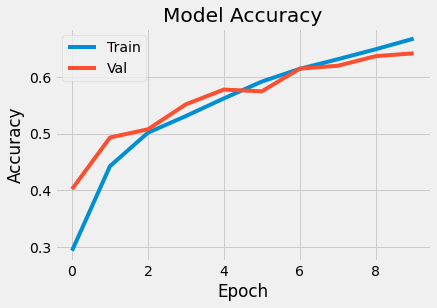

In [18]:
#Visualize the model's accuracy.
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

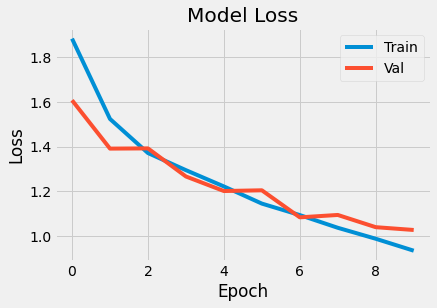

In [19]:
#Visualize the model's loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

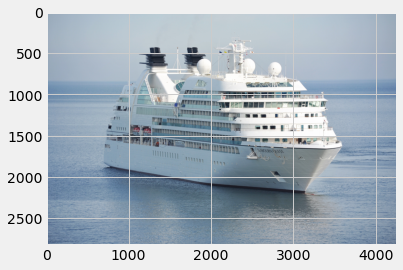

In [20]:
#Test the model with an example.

#Show image.
new_image = plt.imread("Ship1.jpg")

img = plt.imshow(new_image)

# from google.colab import files
# uploaded = files.upload()

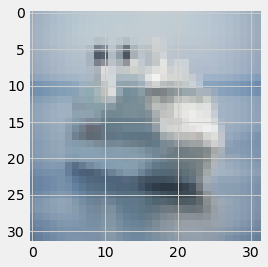

In [21]:
#Resize test image.
#To be 32 x 32 with depth 3.

from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [22]:
#Get the model's predictions
predictions = model.predict(np.array([resized_image]))


#Show the predictions
predictions

1/1 [==============================] - 0s 54ms/step


array([[0.1413996 , 0.00960891, 0.01522794, 0.01824037, 0.01032894,
        0.00492622, 0.00350702, 0.0017751 , 0.7884568 , 0.00652905]],
      dtype=float32)

In [23]:
#Sort the predictions from least to greatest

list_index = [0,1,2,3,4,5,6,7,8,9] #b/c there are ten different predictions

x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
            
            
#Show the sorted labels in order
print(list_index)

[8, 0, 3, 2, 4, 1, 9, 5, 6, 7]


In [24]:
#The results right above this cell show that the highest probability is at index 5, the second highest is at index 3.


In [25]:
#Print the first 5 predictions.

for i in range(5):
    print(classification[list_index[i]], ":", round(predictions[0][list_index[i]]*100, 2),'%')

ship : 78.85 %
airplane : 14.14 %
cat : 1.82 %
bird : 1.52 %
deer : 1.03 %
